In [1]:
# Importing Required Library
import pandas as pd
import lightgbm as lgb
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.metrics import r2_score

In [2]:
# Similarly LGBMRegressor can also be imported for a regression model.
from lightgbm import LGBMRegressor

In [3]:
# Reading the train and test dataset
data = pd.read_csv("drinks.csv")

In [5]:
# Skipping Data Exploration
# Dummification of Diagnosis Column (1-Benign, 0-Malignant Cancer)
data['country']= pd.get_dummies(data['country'])
data['continent']= pd.get_dummies(data['continent'])

In [6]:
# Splitting Dataset in two parts
train_data = data[0:150]
test_data = data[150:193]

In [7]:
# Separating the independent and target variable on both data set
x_train = train_data.drop(columns =['total_litres_of_pure_alcohol'], axis = 1)
y_train = train_data['total_litres_of_pure_alcohol']
x_test = test_data.drop(columns =['total_litres_of_pure_alcohol'], axis = 1)
y_test = test_data['total_litres_of_pure_alcohol']

In [8]:
# Creating an object for model and fitting it on training data set
model = LGBMRegressor()
model.fit(x_train, y_train)

# df = df.fillna(df.median()).clip(-1e11,1e11)

LGBMRegressor()

In [9]:
# Predicting the Target variable
pred = model.predict(x_test)
print(pred)
accuracy = model.score(x_test, y_test)
print(accuracy)

[ 0.6059062  10.87563336  6.40532714  2.0810611   2.76406983 10.29600707
 10.54978094  3.27240236  0.47433146  7.57730925  9.80710054  2.58723462
  1.03924847  6.76863496  4.60790727  8.64576562  8.64576562  0.34337362
  0.32362082  6.29659173  4.17457061  0.15099652  2.10029167  2.09184402
  6.87974829  2.76895281  2.23213888  2.26921547  0.54742218  3.80405841
 10.33301123  2.86308435  9.50227589  3.68688106  9.71530084  7.95681508
  2.46757137  0.86258233  6.30252277  5.1777249   0.05661379  3.06142179
  3.05155531]
0.8275343339617045


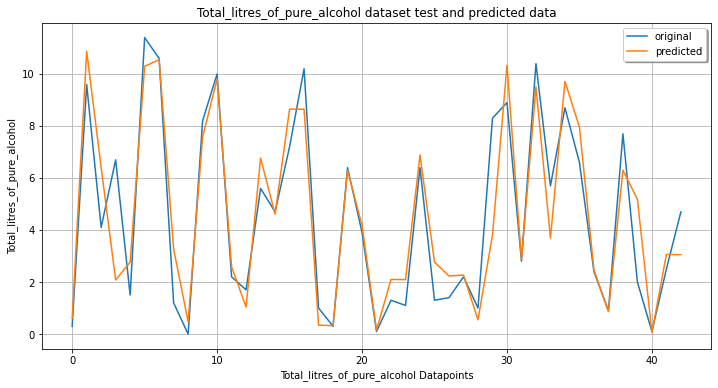

In [10]:
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, pred, label="predicted")
plt.title("Total_litres_of_pure_alcohol dataset test and predicted data")
plt.xlabel('Total_litres_of_pure_alcohol Datapoints')
plt.ylabel('Total_litres_of_pure_alcohol')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

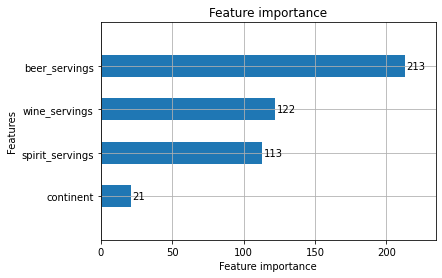

In [11]:
# plotting feature importance
lgb.plot_importance(model, height=.5)

In [12]:
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 1.47
R2: 0.83
